In [1]:
import pysam
import numpy as np
import cPickle as pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
from operator import itemgetter
import pandas as pd

In [2]:
def color_reads(pysam_iter, out_file, color='red'):
    yc_reads = pysam.AlignmentFile(out_file, 'wb', template=st)

    red = '255,0,0'
    green = '0,255,0'
    blue = '0,0,255'
    violet = '255,255,0'
    yellow = '0,255,255'

    black = '0,0,0'
    white = '255,255,255'
    
    if color == 'red':
        c = red
    elif color == 'green':
        c = green
    elif color == 'blue':
        c = blue

    pysam_iter.reset()
    reads = pysam_iter
    
    for r in reads:
        if r.has_tag('RG'):
            r.set_tag('RG', None)
        r.tags += [('YC', c)]
        yc_reads.write(r)

    yc_reads.close()
    pysam.index(out_file)

In [42]:
#AAAGTT  ATATAG  ATCAAA  CCCTGG  CCGGAC  GACCGC  GGCGTC  GTTCGA  TAAAGT  TCTGCA  TTAATC
sample = 'ATATAG'
in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
st = pysam.AlignmentFile(in_file,"rb")

In [48]:
st = pysam.AlignmentFile('/data/UMI/data/Tet1.ens_exon_tagged.bam', 'rb')

In [49]:
st.reset()
reads = st.fetch(until_eof=True)

In [50]:
%%time
umis = []
for r in reads:
    if not r.is_unmapped:
        umis.append(r.get_tag('XM'))

CPU times: user 3min 19s, sys: 4.25 s, total: 3min 23s
Wall time: 3min 24s


In [51]:
amb = [i for i in umis if 'N' in i]

In [52]:
amb

[]

In [6]:
a = sorted(Counter(umis).items(), key=itemgetter(1), reverse=True)
#'GGGCTGGTGA'
ds1 = [j for i,j in a]

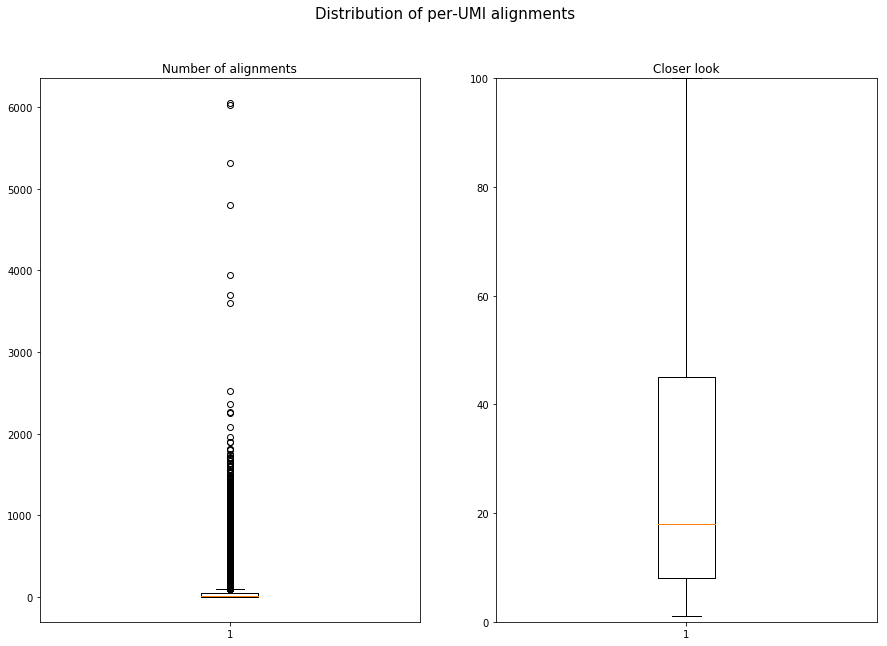

In [31]:
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.boxplot(ds1)
plt.title('Number of alignments')

plt.subplot(1, 2, 2)
plt.boxplot(ds1)
plt.title('Closer look')
plt.ylim(0,100)

plt.suptitle('Distribution of per-UMI alignments', fontsize=15)
plt.savefig('umi.png')

In [33]:
ds1 = [i for i,j in a if j == 5]

['GATGACATGA',
 'GGGGTACGAC',
 'TATCACGGAA',
 'TCTGAGCTCT',
 'TCAATTAGAC',
 'ATTGAGTCTG',
 'GCACTATAGA',
 'GTCGTAAAGT',
 'AATTGCTGGG',
 'CTGCAATAGT',
 'AATTGCTGGT',
 'CCTACTGCTA',
 'CAGCCTTATT',
 'TTCTAATCGC',
 'GCCACGCTGC',
 'ACGTTGATCG',
 'TCCTATAAGT',
 'TGGGTGGGTG',
 'GCGGGCAGTC',
 'AGAGCGATCT',
 'GGACGGGGTT',
 'TGGTGTTCGA',
 'CTAAGAACAG',
 'TAATGCGGAC',
 'ATGATTGGAC',
 'TAAGTCAAGA',
 'TTCTTAGTAT',
 'GAGTTTCCAA',
 'TTATTCGCGC',
 'CTACTAGCAG',
 'TTTTTGCGAA',
 'ATTAGTGTTC',
 'AGGACTTCTC',
 'GCCATAACTT',
 'AGGTCGGTCT',
 'GGCTGCGCTA',
 'AGTTATAACG',
 'AGACAGTTCG',
 'TTAAGTGTAC',
 'CGCCTGCATC',
 'CTGGTCTGCG',
 'TAACGTGTTG',
 'ACTGGGGACT',
 'TTAGAACCGT',
 'ATATTCTTGG',
 'TACATGTGCG',
 'GAGAAGACTG',
 'GTAGTTTGCG',
 'ACCTGAGGCA',
 'TTGCTAAGTC',
 'ATGAGGTTGG',
 'TGGTCCATGG',
 'GTACTGGGGA',
 'TGGGCGGCGA',
 'AAAATACGTC',
 'TATGTCCCGA',
 'ACGTGTGAAA',
 'GCTCGCCATT',
 'CACCAAACTC',
 'CTTATACAAG',
 'TAGAATTGGA',
 'GTTAACGTCT',
 'CCACACGGCG',
 'TGTATCTCAG',
 'TCGTTTGTTC',
 'TCGTTTGTTG',
 'GATAAGTT

### Original bam file 

In [26]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped and r.get_tag('XM') == 'GATGACATGA':
        print r.reference_name, r.reference_start
        print r


chr11 20091755
HISEQ:280:C9J9KANXX:1:2215:15146:97826	0	1	20091755	3	50M	-1	-1	50	GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT	array('B', [27, 18, 18, 14, 22, 34, 34, 29, 37, 15, 15, 31, 38, 38, 37, 38, 29, 15, 28, 34, 37, 33, 37, 38, 21, 28, 32, 25, 37, 29, 15, 15, 15, 15, 14, 15, 14, 22, 36, 30, 38, 38, 14, 23, 32, 37, 2, 2, 2, 2])	[('XC', 'ATATAG'), ('GE', 'B2_Mm1t_dup14786'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 2), ('NM', 1), ('XM', 'GATGACATGA'), ('UQ', 15), ('AS', 47), ('GS', '+')]
chr11 20180683
HISEQ:280:C9J9KANXX:1:2215:15146:97826	256	1	20180683	3	50M	-1	-1	50	GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT	array('B', [27, 18, 18, 14, 22, 34, 34, 29, 37, 15, 15, 31, 38, 38, 37, 38, 29, 15, 28, 34, 37, 33, 37, 38, 21, 28, 32, 25, 37, 29, 15, 15, 15, 15, 14, 15, 14, 22, 36, 30, 38, 38, 14, 23, 32, 37, 2, 2, 2, 2])	[('XC', 'ATATAG'), ('GE', 'B2_Mm1a_dup11405'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 2), ('NM', 1), ('XM', 'GATGACATGA'), (

In [27]:
qns = ['HISEQ:280:C9J9KANXX:1:2215:15146:97826', 'HISEQ:280:C9J9KANXX:1:2201:10903:83526', 'HISEQ:280:C9J9KANXX:1:2213:10613:32557']

### Bowtie2 result

In [7]:
import pysam
bst = pysam.AlignmentFile('/home/parastou/Bowtie2d/sample.sam','rb')
breads = bst.fetch(until_eof=True)
cnt = 0
for r in breads:
    #if r.query_name in qns:
    cnt += 1
        #print r.reference_name, r.reference_start
        #print r
        #print
print cnt

86590


In [17]:
bst = pysam.AlignmentFile('/home/parastou/Bowtie2d/sample2.sam')
breads = bst.fetch(until_eof=True)
cnt = 0
for r in breads:
    cnt += 1
    print r
    print r.reference_name
    print r.reference_start
    print r.mapping_quality
    print
print cnt

HISEQ:280:C9J9KANXX:1:2215:15146:97826	16	2	117424286	1	50M	-1	-1	50	ACAGATGGTTGTGAGCCACCATGTGGTTGCTGTGATTTGAACTTCAGACC	array('B', [2, 2, 2, 2, 37, 32, 23, 14, 38, 38, 30, 36, 22, 14, 15, 14, 15, 15, 15, 15, 29, 37, 25, 32, 28, 21, 38, 37, 33, 37, 34, 28, 15, 29, 38, 37, 38, 38, 31, 15, 15, 37, 29, 34, 34, 22, 14, 18, 18, 27])	[('AS', -3), ('XS', -3), ('XN', 0), ('XM', 1), ('XO', 0), ('XG', 0), ('NM', 1), ('MD', '32G17'), ('YT', 'UU')]
chr12
117424286
1

HISEQ:280:C9J9KANXX:1:2201:10903:83526	16	7	88519425	0	50M	-1	-1	50	ACAGATGGTTGTGAGCCACCATGTGGTTGCTTGTATTTGAACTTCAGACC	array('B', [2, 2, 2, 2, 2, 2, 2, 2, 37, 27, 25, 29, 16, 15, 16, 14, 16, 16, 16, 16, 16, 36, 15, 28, 16, 16, 37, 31, 15, 16, 31, 16, 16, 26, 16, 38, 37, 31, 16, 16, 16, 16, 37, 31, 16, 15, 15, 27, 29, 25])	[('AS', -12), ('XS', -19), ('XN', 0), ('XM', 3), ('XO', 0), ('XG', 0), ('NM', 3), ('MD', '33G9C0A5'), ('YT', 'UU')]
chr17
88519425
0

HISEQ:280:C9J9KANXX:1:2213:10613:32557	0	10	88697113	3	12M3D38M	-1	-1	50	GTGTACTTAC

In [19]:
bst = pysam.AlignmentFile('/home/parastou/Bowtie2d/sample3.sam')
breads = bst.fetch(until_eof=True)
cnt = 0
for r in breads:
    cnt += 1
    print r
    print r.reference_name
    print r.reference_start
    print
print cnt

HISEQ:280:C9J9KANXX:1:2215:15146:97826	0	32	100764426	1	50M	-1	-1	50	GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT	array('B', [27, 18, 18, 14, 22, 34, 34, 29, 37, 15, 15, 31, 38, 38, 37, 38, 29, 15, 28, 34, 37, 33, 37, 38, 21, 28, 32, 25, 37, 29, 15, 15, 15, 15, 14, 15, 14, 22, 36, 30, 38, 38, 14, 23, 32, 37, 2, 2, 2, 2])	[('AS', -3), ('XS', -3), ('XN', 0), ('XM', 1), ('XO', 0), ('XG', 0), ('NM', 1), ('MD', '17T32'), ('YT', 'UU')]
chr7
100764426

HISEQ:280:C9J9KANXX:1:2215:15146:97826	272	1	107023715	1	50M	-1	-1	50	ACAGATGGTTGTGAGCCACCATGTGGTTGCTGTGATTTGAACTTCAGACC	array('B', [2, 2, 2, 2, 37, 32, 23, 14, 38, 38, 30, 36, 22, 14, 15, 14, 15, 15, 15, 15, 29, 37, 25, 32, 28, 21, 38, 37, 33, 37, 34, 28, 15, 29, 38, 37, 38, 38, 31, 15, 15, 37, 29, 34, 34, 22, 14, 18, 18, 27])	[('AS', -3), ('XS', -3), ('XN', 0), ('XM', 1), ('XO', 0), ('XG', 0), ('NM', 1), ('MD', '32G17'), ('YT', 'UU')]
chr11
107023715

HISEQ:280:C9J9KANXX:1:2215:15146:97826	272	34	114338000	1	50M	-1	-1	50	ACAGATGGTTGTGAG

----------------------

In [32]:
import itertools

def hamming(str1, str2):
    return sum(itertools.imap(str.__ne__, str1, str2))

In [7]:
hamming('GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT','GGTCTGAAGTTCAAATACAAGCAACCACATGGTGGCTCACAACCATCTGT')

3

----------------------------

### STAR with new params 

--outFilterMultimapScoreRange 5
--outFilterMultimapNmax 100

In [23]:
nst = pysam.AlignmentFile('/home/parastou/STARd/sample/tet1i.bam',"rb")
nst.reset()
nreads = nst.fetch(until_eof=True)
for r in nreads:
    print r.reference_name
    print r.reference_start
    if r.get_tag('NH') > 1:
        print r

In [18]:
nst.reset()
out_file = '/home/parastou/STARd/sample/tet1j_colored.bam'
color_reads(nst, out_file, color='red')

In [13]:
#pysam.sort('-o', '/home/parastou/STARd/tet1j.bam', '/home/parastou/STARd/tet1iAligned.out.bam')
#pysam.index('/home/parastou/STARd/tet1j.bam');
#st = pysam.AlignmentFile('/home/parastou/STARd/tet1j.bam',"rb")
st.reset()
reads = st.fetch(until_eof=True)
cnt = 0
for r in reads:
    print r.reference_name
    print r.reference_start
    if r.get_tag('NH') > 1:
        print r
        cnt += 1
print cnt

chr10
67369623
HISEQ:280:C9J9KANXX:1:2215:15146:97826	272	0	67369623	0	50M	-1	-1	50	ACAGATGGTTGTGAGCCACCATGTGGTTGCTGTGATTTGAACTTCAGACC	array('B', [2, 2, 2, 2, 37, 32, 23, 14, 38, 38, 30, 36, 22, 14, 15, 14, 15, 15, 15, 15, 29, 37, 25, 32, 28, 21, 38, 37, 33, 37, 34, 28, 15, 29, 38, 37, 38, 38, 31, 15, 15, 37, 29, 34, 34, 22, 14, 18, 18, 27])	[('NH', 22), ('HI', 13), ('AS', 43), ('nM', 3)]
chr10
115925518
HISEQ:280:C9J9KANXX:1:2215:15146:97826	256	0	115925518	0	50M	-1	-1	50	GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT	array('B', [27, 18, 18, 14, 22, 34, 34, 29, 37, 15, 15, 31, 38, 38, 37, 38, 29, 15, 28, 34, 37, 33, 37, 38, 21, 28, 32, 25, 37, 29, 15, 15, 15, 15, 14, 15, 14, 22, 36, 30, 38, 38, 14, 23, 32, 37, 2, 2, 2, 2])	[('NH', 22), ('HI', 16), ('AS', 47), ('nM', 1)]
chr11
39150627
HISEQ:280:C9J9KANXX:1:2213:10613:32557	256	1	39150627	0	22M18743N28M	-1	-1	50	GTGTACTTACATATAAATAAATTTTAAAAAAAAAAAAAAAAAAAAAAAAA	array('B', [18, 18, 18, 15, 27, 16, 16, 16, 28, 16, 31, 16, 34, 31, 38

In [34]:
ref = 'GGTCTGAAGTTCAAATCCCAGCAACCACATGGTGGCTCACAACCATCTGT'

In [38]:
#HISEQ:280:C9J9KANXX:1:2215:15146:97826
#HISEQ:280:C9J9KANXX:1:2201:10903:83526

print hamming(ref, 'GGTCTGAAGTTCAAATCACAGCAACCACATGGTGGCTCACAACCATCTGT')
print hamming(ref, 'GGTCTGAAGTTCAAATACAAGCAACCACATGGTGGCTCACAACCATCTGT')

1
2


In [45]:
qns = ['HISEQ:280:C9J9KANXX:1:2201:10903:83526','HISEQ:280:C9J9KANXX:1:2213:10613:32557','HISEQ:280:C9J9KANXX:1:2215:15146:97826']

In [45]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped:
        ref = r.reference_name
        start = r.reference_start
        if ref == 'chr13' and 14056401 < start < 14056649:
            if hamming(r.get_tag('XM'), 'GATGACATGA') < 4 :
                print r

HISEQ:280:C9J9KANXX:2:1211:6359:16136	0	3	14056463	255	50M	-1	-1	50	CTTCCAGACTGCTCTTCCGAAGGTTCAAATCCCAGCAAACACATGGTGGC	array('B', [18, 25, 27, 29, 15, 36, 26, 37, 38, 31, 16, 26, 16, 16, 16, 16, 16, 16, 26, 36, 38, 24, 14, 16, 15, 16, 27, 37, 38, 16, 16, 16, 15, 29, 16, 16, 29, 36, 16, 15, 29, 15, 36, 2, 2, 2, 2, 2, 2, 2])	[('XC', 'ATATAG'), ('GE', 'B2_Mm1a_dup13724'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 1), ('XM', 'GATTATATAA'), ('UQ', 16), ('AS', 47), ('GS', '+')]
HISEQ:280:C9J9KANXX:1:2213:10613:32557	0	3	14056562	255	50M	-1	-1	50	GTGTACTTACATATAAATAAATTTTAAAAAAAAAAAAAAAAAAAAAAAAA	array('B', [18, 18, 18, 15, 27, 16, 16, 16, 28, 16, 31, 16, 34, 31, 38, 38, 38, 16, 37, 38, 38, 34, 16, 16, 16, 31, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38])	[('XC', 'ATATAG'), ('GE', 'B2_Mm1a_dup13724'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 4), ('XM', 'GATGACATGA'), ('UQ', 108), ('AS', 41), ('GS

<Container object of 8 artists>

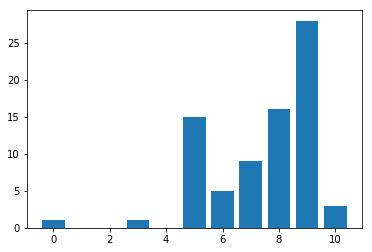

In [48]:
st.reset()
reads = st.fetch(until_eof=True)
b = []
for r in reads:
    if not r.is_unmapped:
        ref = r.reference_name
        start = r.reference_start
        if ref == 'chr13' and 14056401 < start < 14056649:
            b.append(hamming(r.get_tag('XM'), 'GATGACATGA'))
a = sorted(Counter(b).items())
x = [i for i,j in a]
y = [j for i,j in a]
plt.bar(x,y)

In [50]:
from IPython.display import Image

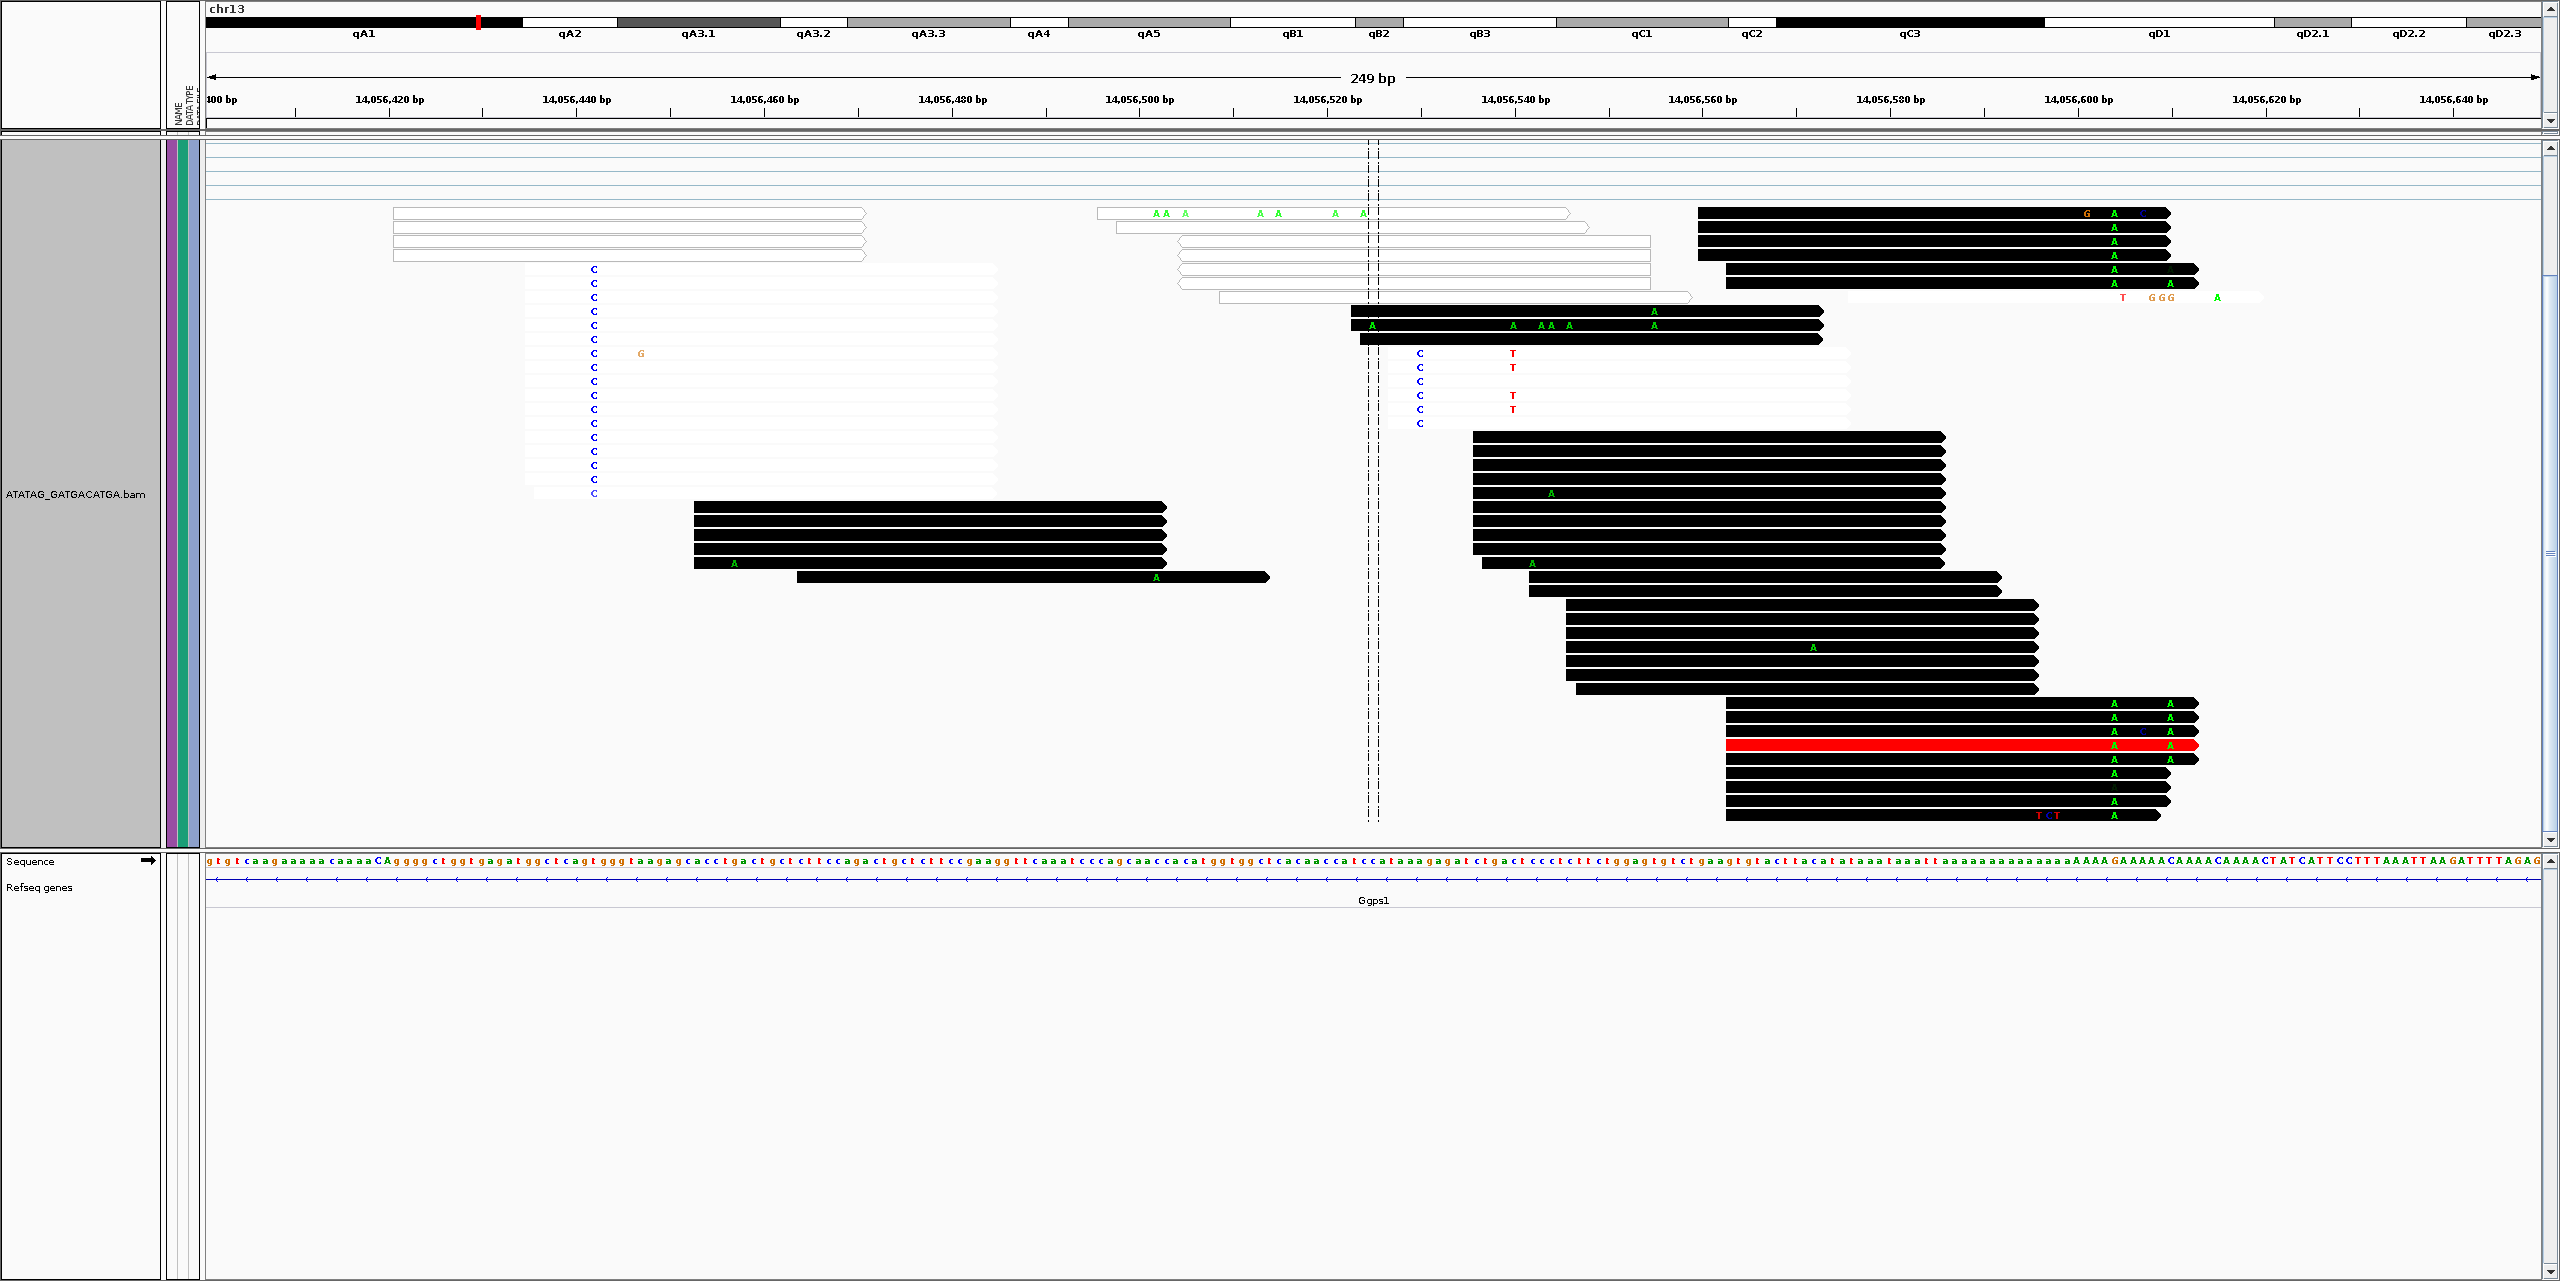

In [51]:
Image(filename='/home/parastou/igv_snapshot.png')

In [52]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped and r.get_tag('XM') == 'TTTTTGCGAA':
        print r.reference_name, r.reference_start
        print r

chr17 35058612
HISEQ:280:C9J9KANXX:2:1301:16469:25741	0	7	35058612	255	50M	-1	-1	50	GTGGGGTGGGGCTGTGGGATAAGGCAAAGGATAGTGGACAAGGGTAAGAT	array('B', [32, 18, 27, 29, 15, 14, 14, 14, 14, 24, 14, 24, 14, 14, 28, 28, 16, 34, 36, 29, 38, 38, 16, 16, 37, 37, 38, 38, 36, 16, 36, 25, 35, 25, 16, 16, 25, 28, 16, 35, 37, 16, 25, 14, 15, 36, 37, 37, 34, 15])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000007041'), ('XF', 'UTR'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 0), ('XM', 'TTTTTGCGAA'), ('UQ', 0), ('AS', 49), ('GS', '+')]
chr17 35058612
HISEQ:280:C9J9KANXX:2:2202:13173:67576	0	7	35058612	255	50M	-1	-1	50	GTGGGGAGGGGCTGTGGGATAAGGCAAAGGATAGTGGACAAGGGTAAGAT	array('B', [27, 18, 27, 15, 27, 14, 14, 26, 14, 14, 27, 24, 14, 24, 16, 16, 28, 14, 37, 16, 37, 38, 31, 16, 27, 37, 38, 38, 29, 25, 37, 29, 38, 16, 16, 16, 15, 29, 16, 36, 38, 16, 15, 14, 28, 36, 37, 31, 38, 15])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000007041'), ('XF', 'UTR'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 1), ('XM', 'TTTTTGCG

In [4]:
p = []
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped and r.get_tag('XM') =='GGGCTGGTGA':
        ref = r.reference_name
        start = r.reference_start
        gene = None
        if r.has_tag('GE'):
            gene = r.get_tag('GE')
        p.append((gene, ref, start))

KeyboardInterrupt: 

In [16]:
df = pd.DataFrame(p, columns=['gene','ref','start'])

In [18]:
df = df.drop_duplicates()

In [27]:
a = min(list(df[df['ref'] == 'chr10']['start']))
b = max(list(df[df['ref'] == 'chr10']['start'])) + 50

---------------------------------------------

### Duplicate Check

In [3]:
in_file = '/data/UMI/data/Tet1.ens_exon_tagged.bam'
st = pysam.AlignmentFile(in_file,"rb")

In [3]:
#AAAGTT  ATATAG  ATCAAA  CCCTGG  CCGGAC  GACCGC  GGCGTC  GTTCGA  TAAAGT  TCTGCA  TTAATC
samples = ['AAAGTT','ATATAG','ATCAAA','CCCTGG','CCGGAC','GACCGC','GGCGTC','GTTCGA','TAAAGT','TCTGCA','TTAATC']

In [ ]:
#-------------------------------- Writes fastq file entries with a specific id to a new fastq file

from Bio import SeqIO

in_file = "/data/mm10/tet1n.unaligned_tagged_filtered.fastq" # Input fasta file
out_file = "/data/mm10/s1.fastq" # Output fasta file

def filter_fasta_by_id(in_file, out_file, ids):

    fasta_sequences = SeqIO.parse(open(in_file),'fastq')
    with open(out_file, "w") as f:
        for seq in fasta_sequences:
            if seq.id in ids:
                SeqIO.write([seq], f, "fastq")

In [6]:
#-------------------------------- Returns redundant read names from the given file

def redundant_qnames(pysam_iter):
    
    pysam_iter.reset()
    reads = pysam_iter.fetch(until_eof=True)
    
    x = []
    for r in reads:
        xs = r.get_tag('XM') + '_' + r.query_sequence
        x.append((xs , r.query_name))
    st.close()
        
    df = pd.DataFrame(x, columns = ['XS', 'QN'])
    dfg = df.groupby('XS')['QN']
    reps = []
    for name, group in dfg:
        if len(group) > 1:
            for g in group[1:]:
                reps.append(g)
                
    return len(reps)

In [12]:
redundant_qn = 0

for sample in samples:
    
    in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
    st = pysam.AlignmentFile(in_file,"rb")
    print 'Calculating the number of redundant reads in sample %s...' %sample
    r = redundant_qnames(st)
    print 'Sample %s contains %s redundant reads' %(sample, format(r,','))
    redundant_qn += r
    print 'Total number of redundant reads : %s' %format(redundant_qn,',')
    print

Calculating the number of redundant reads in sample AAAGTT...
Sample AAAGTT contains 5,016,225 redundant reads
Total number of redundant reads : 5,016,225

Calculating the number of redundant reads in sample ATATAG...
Sample ATATAG contains 24,660,521 redundant reads
Total number of redundant reads : 29,676,746

Calculating the number of redundant reads in sample ATCAAA...
Sample ATCAAA contains 19,045,547 redundant reads
Total number of redundant reads : 48,722,293

Calculating the number of redundant reads in sample CCCTGG...
Sample CCCTGG contains 8,591,671 redundant reads
Total number of redundant reads : 57,313,964

Calculating the number of redundant reads in sample CCGGAC...
Sample CCGGAC contains 20,740,290 redundant reads
Total number of redundant reads : 78,054,254

Calculating the number of redundant reads in sample GACCGC...
Sample GACCGC contains 9,365,873 redundant reads
Total number of redundant reads : 87,420,127

Calculating the number of redundant reads in sample GGCG

In [ ]:
# cat tet1n.unaligned_tagged_filtered.fastq | grep '^@H' |wc -l    =  366,889,244

In [19]:
df = pd.DataFrame(x, columns = ['XS', 'QN'])

In [21]:
dfg = df.groupby('XS')['QN']

In [22]:
reps = []
for name, group in dfg:
    if len(group) > 1:
        for g in group[1:]:
            reps.append(g)

### UMI Groups with more member reads

In [7]:
ds2 = [i for i,j in a if 8 < j <= 10]

In [8]:
ds2

['ACGTCCAAAT',
 'TAAGCTCGTC',
 'TTCGGGGATA',
 'ATGACTTATC',
 'TGCTTAGCTC',
 'GTCTTCAATG',
 'CTGCGGATTG',
 'ACGGGCACAG',
 'TTCACCCCCC',
 'AATTAGGTCG',
 'TAGAAAGGAA',
 'TTTCTGAAAT',
 'TAAGAACTGC',
 'TCCCATCGTG',
 'ATATTGCACT',
 'CACTCCTCTC',
 'GGTCTCAATA',
 'TCGGTCACGG',
 'GAGCGTCATT',
 'GAAACACGCC',
 'TGAATATACA',
 'AGTGCCAGAA',
 'AACACATCAG',
 'ATATGAATAA',
 'TTCGGCTAGG',
 'GGCGAAGCCT',
 'TACCTAGACT',
 'GTCTTTCTGG',
 'GATCCTGAAC',
 'GTTTTTACTT',
 'CCGGTCACAG',
 'CCGAACTGGG',
 'CTAACTGCTT',
 'AGGTCGGTCA',
 'AACTTTCGCG',
 'TCAACGGGTC',
 'ACTGTCGTCG',
 'TCCCATACTT',
 'GTTCTTAATG',
 'CACAGCTGGA',
 'TGCGATTTCA',
 'ACAAGAACGC',
 'GAGAATTCTT',
 'TGCCTTTTGA',
 'CTTTCCTTCG',
 'AAACAAATTT',
 'AGTTTTATCA',
 'GACGTTCCAT',
 'CTCGGTGCAA',
 'TTTCTTCTCG',
 'ATCTGTAAAG',
 'CCAGGGGCTT',
 'TTCTCACGAC',
 'ATGCGTAACA',
 'TGTGCCAACA',
 'CGCTTGGGAC',
 'CTGCTCTACA',
 'TTTGGGATAC',
 'GCGGTGAATC',
 'CAACGCTGAG',
 'TACGATGTCA',
 'CGACTACAAA',
 'CGATTAGTCT',
 'CTCGCGGACC',
 'TTCTTGGGAA',
 'AATTAAACGT',
 'TTTGCAGA

In [9]:
xm = 'GGCGAAGCCT'
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped and r.get_tag('XM') == xm:
        print r.reference_name, r.reference_start
        print r

chr8 71493182
HISEQ:280:C9J9KANXX:1:1107:10951:69007	0	34	71493182	255	50M	-1	-1	50	GTCCACAAGGATCAGTCAGCCTTACCTTCTAGAACTTTGCTGACGTGCTT	array('B', [32, 18, 29, 31, 33, 38, 38, 38, 38, 33, 38, 34, 37, 38, 36, 26, 31, 38, 35, 34, 33, 16, 16, 36, 34, 27, 25, 16, 16, 25, 36, 34, 34, 37, 25, 16, 16, 16, 16, 15, 15, 25, 36, 31, 2, 2, 2, 2, 2, 2])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000007610'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 0), ('XM', 'GGCGAAGCCT'), ('UQ', 0), ('AS', 49), ('GS', '+')]
chr8 71493182
HISEQ:280:C9J9KANXX:1:1206:15184:93906	0	34	71493182	255	50M	-1	-1	50	GTCCACAAGGATCAGTCAGCCTTACCTTCTAGAACTTTACTGACGTGCTT	array('B', [25, 25, 18, 25, 33, 38, 38, 38, 33, 15, 36, 26, 16, 36, 16, 26, 28, 37, 16, 16, 16, 16, 16, 36, 16, 16, 16, 16, 16, 25, 36, 16, 29, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000007610'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 1), ('XM', 'GGCGAAGCCT'), ('UQ', 2),

In [10]:
 xm = 'ATCGCTCCAT'
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped and r.get_tag('XM') == xm:
        print r.reference_name, r.reference_start
        print r

chr7 45127045
HISEQ:280:C9J9KANXX:1:1205:9718:78029	16	32	45127045	255	47M116N3M	-1	-1	50	GGAGGGGTTGGTATTCATCCGCTTCCGGAGAAAGGCCAGATACTTTAACT	array('B', [2, 2, 2, 2, 2, 2, 38, 38, 38, 31, 34, 33, 16, 34, 36, 23, 14, 35, 23, 24, 25, 14, 38, 37, 29, 14, 37, 30, 31, 28, 15, 31, 15, 28, 15, 15, 15, 29, 38, 38, 34, 37, 38, 36, 37, 31, 25, 18, 31, 27])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000074129'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 0), ('XM', 'ATCGCTCCAT'), ('UQ', 0), ('AS', 50), ('GS', '-')]
chr7 100263160
HISEQ:280:C9J9KANXX:2:2111:20528:66204	0	32	100263160	255	15M2360N35M	-1	-1	50	GCCAAACTGATTTAGAGTCCAATAAAGTGTAGGTGTGGCAAAAAAAAAAA	array('B', [18, 18, 25, 25, 15, 16, 26, 16, 16, 16, 26, 16, 28, 37, 16, 37, 31, 26, 16, 16, 37, 36, 31, 38, 38, 38, 36, 16, 25, 25, 34, 25, 16, 25, 16, 16, 24, 14, 15, 28, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38])	[('XC', 'ATATAG'), ('XF', 'INTRONIC'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 3), ('XM', 'ATCGCTCCAT'), ('UQ',

In [4]:
dataset = []
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if not r.is_unmapped:
        dataset.append((r.get_tag('XM'),r.reference_name + ':' + str(r.reference_start)))
dsdf = pd.DataFrame(dataset, columns=['XM','CO'])

In [5]:
dsdf

,XM,CO
0,CAGAGCATAA,chr10:3105430
1,CAGGGGCTGA,chr10:3105433
2,GCATCGATGC,chr10:3105434
3,CTAACCATAT,chr10:3106771
4,ACATTTGCTT,chr10:3108581
5,GGACCAACCT,chr10:3139603
6,CAGTGACCAG,chr10:3139603
7,CCCATAGCCT,chr10:3140564
8,CCCATAGCCT,chr10:3140564
9,CCCATAGCCT,chr10:3140564


In [13]:
xmdf = pd.DataFrame(ds2, columns=['XM'])

In [14]:
df10 = pd.merge(xmdf, dsdf, how='inner', on=['XM'])

In [21]:
d1 = df10.groupby('XM')['CO']

In [24]:
report1 = []
for name, group in d1:
    report1.append((name, len(np.unique(group))))

In [29]:
a = Counter(dict(report1).values())

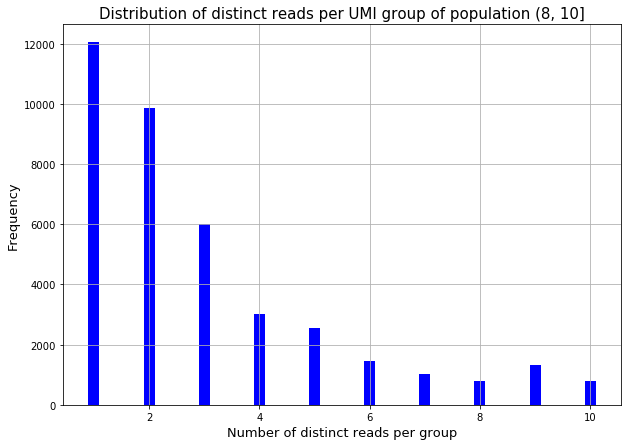

In [43]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.xaxis.grid()
ax = plt.subplot(111)
ax.bar(a.keys(),a.values(), width=.2, color='b')
plt.title('Distribution of distinct reads per UMI group of population (8, 10]', fontsize=15)
plt.xlabel('Number of distinct reads per group', fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

In [29]:
st.reset()
reads = st.fetch(until_eof=True)
g = []
for r in reads:
    if not r.is_unmapped:
        g.append((r.get_tag('XM'), r.get_tag('XM') + ':' + r.query_sequence))

d1 = pd.DataFrame(g, columns=['XM','XS'])
d2 = d1.drop_duplicates(subset=['XS'])
d3 = d2.groupby('XM')['XS']

In [30]:
d = []
for name, group in d3:
    d.append((name, len(group)))

In [41]:
a = Counter(dict(d).values())
#sorted(a.items(), key=itemgetter(1), reverse=True)
a.items()
x = [i for i,j in a.items()]
y = [j for i,j in a.items()]
y

[77283,
 98600,
 66246,
 74875,
 50940,
 54371,
 37979,
 38469,
 27790,
 27694,
 19940,
 19011,
 14131,
 13312,
 9900,
 9109,
 7188,
 6334,
 4937,
 4355,
 3471,
 3029,
 2333,
 2166,
 1612,
 1384,
 1100,
 955,
 740,
 633,
 546,
 466,
 389,
 320,
 281,
 210,
 179,
 152,
 123,
 95,
 97,
 73,
 67,
 61,
 33,
 48,
 30,
 22,
 22,
 18,
 15,
 14,
 15,
 6,
 15,
 7,
 6,
 4,
 5,
 3,
 6,
 5,
 2,
 1,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1]

In [16]:
#'CAGAGCATAA'
d2 = d1[(d1['XM'] == 'CAGAGCATAA')]
d3 = d2.drop_duplicates(subset=['XS'])

In [26]:
d4 = d3.groupby('XM')['XS']
for n,g in d4:
    print n
    print g
len(d3)

CAGAGCATAA
0           CAGAGCATAA:CAGGGTTTCTCTGTGTAGCCCTGGCTGTCCTGGAA...
437901      CAGAGCATAA:GGTCTATAAAGTGAGTTCCAGGACAGCCAGGGCTA...
800214      CAGAGCATAA:CAGGGTTTCTCTGTGTAGCCCTGGCTGTCCTGGAA...
934506      CAGAGCATAA:GGTCTAAAAAGTGAGTTCCAGGACAGCCAGGGCTA...
7287877     CAGAGCATAA:TTTTTTTTTTTTTTTTTTTTTTTTTTTACATTTTC...
9136141     CAGAGCATAA:AGACAATAAAGAGATGAAAATGTAAAAAAAAAAAA...
12841131    CAGAGCATAA:TTTTTTTTTTTTTTTTTTTTTTTTTTTACAGTTTC...
17211456    CAGAGCATAA:AGCCAATAAAGAGCTGAACCTGTAAAAAAAAAAAA...
Name: XS, dtype: object


8

In [22]:
cnt = 0
p = 'GGTCTATAAAGTGAGTTCCAGGACAGCCAGGGCTACACAGAGAAACCCTG'
for item in list(d2['XS']):
    if p in item:
        cnt +=1
print cnt

342
